In [43]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [44]:
df = pd.read_csv('../data_cleaning/cleaned_df.csv')

In [45]:
df.head()

property_type  area  bathrooms  bedrooms  parking_spots neighborhood  rent  \
0     apartment   228          4         3              1   Boa Viagem  6000   
1     apartment   112          4         4              2   Boa Viagem  3500   
2     apartment   160          5         4              3   Boa Viagem  6232   
3     apartment    75          3         3              2  Tamarineira  3200   
4     apartment   200          5         5              3   Boa Viagem  6000   

   more_than_1_floor  furnished  barbecue_grill  kitchen  security  \
0                  0          0               0        0         0   
1                  0          0               1        0         1   
2                  0          0               0        0         1   
3                  0          0               0        0         1   
4                  0          0               0        0         0   

   beach_distance  latitude  longitude  
0        0.157674 -8.130101 -34.900182  
1        0.278380 -8.143875 -34.907153  
2        0.120035 -8.139654 -34.903205  
3        3.835353 -8.032416 -34.901019  
4        0.166399 -8.133530 -34.902099

# EDA

In [46]:
#PLotting histogram
trace = go.Histogram(x=df.rent, nbinsx = 150, marker =  {'color' : '#2d98da',
                              'line' : {'width': 1,
                                        'color': '#3B3B98'}}, 
                   opacity=0.8)

data = [trace]


layout = go.Layout(title='Rent distribution', title_x=0.5, title_y = 0.9, autosize=False,
    width=900,
    height=500)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)


#Plotting boxplot
trace = go.Box(y = df.rent,
                marker = {'color': '#2d98da'}, name = 'rent')

data = [trace]

layout = go.Layout(title='Rent boxplot', title_x=0.5, title_y = 0.9, autosize=False,
    width=500,
    height=600)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [47]:
df.sort_values(by = ['rent', 'area'], ascending = False).head()

property_type  area  bathrooms  bedrooms  parking_spots  neighborhood  \
3010     apartment   159          3         4              2        Graças   
1767     apartment    10          1         2              1  Casa Amarela   
3244     apartment    70          2         2              1         Torre   
3420         house  1000          6         5             12    Boa Viagem   
3338         house  1000          6         5             12    Boa Viagem   

        rent  more_than_1_floor  furnished  barbecue_grill  kitchen  security  \
3010  953550                  0          0               1        1         1   
1767  270000                  0          0               0        1         0   
3244  180000                  0          0               0        0         0   
3420   50000                  1          0               0        0         0   
3338   49999                  1          0               0        0         0   

      beach_distance  latitude  longitude  
3010        3.961357 -8.049984 -34.901722  
1767        5.744727 -8.029845 -34.918172  
3244        4.464057 -8.042511 -34.907464  
3420        0.726915 -8.123503 -34.903396  
3338        0.726915 -8.123503 -34.903396

Here we can see that both the histogram and the boxplot were barely visible because of outliers. Still, there were 3 specific outliers that were the most far from the others. In the first 3 rows of the previous cell we see them.

These were probably posts that had typos in their rent value, since it doesn't make sense for a property with 160m², 10m² or 70m² of area to be that pricy. Having that said, we'll remove these 3 rows of misleading data.

In [48]:
df = df[df.rent < 150000]

In [49]:
#Plotting boxplot
trace = go.Box(y = df.rent,
                marker = {'color': '#2d98da'}, name = 'rent')

data = [trace]

layout = go.Layout(title='Rent boxplot', title_x=0.5, title_y = 0.9, autosize=False,
    width=500,
    height=600)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [50]:
df.sort_values(by = ['rent'], ascending = False).head()

property_type  area  bathrooms  bedrooms  parking_spots neighborhood  \
3420         house  1000          6         5             12   Boa Viagem   
3338         house  1000          6         5             12   Boa Viagem   
452      apartment   450          5         4              5   Boa Viagem   
3557         house   800          1         1              0       Graças   
1434     apartment   420          6         4              5         Pina   

       rent  more_than_1_floor  furnished  barbecue_grill  kitchen  security  \
3420  50000                  1          0               0        0         0   
3338  49999                  1          0               0        0         0   
452   49400                  0          1               0        0         0   
3557  45000                  0          0               0        0         0   
1434  30000                  0          0               0        0         0   

      beach_distance  latitude  longitude  
3420        0.726915 -8.123503 -34.903396  
3338        0.726915 -8.123503 -34.903396  
452         0.070521 -8.112667 -34.890921  
3557        3.759485 -8.045166 -34.900769  
1434        1.198108 -8.096303 -34.894688

After cleaning the data, we can see that there's still some really expensive properties. These are mostly comercial properties instead of houses or apartments. Some are even poorly described as of one with 800m², 1 bedroom but with a rent of $45000. Given those reasons, we'll filter the dataset for all properties with value bellow or equal to 30k.

In [51]:
df = df[df.rent <= 30000]

In [52]:
#Plotting boxplot
trace = go.Box(y = df.rent,
                marker = {'color': '#2d98da'}, name = 'rent')

data = [trace]

layout = go.Layout(title='Rent boxplot', title_x=0.5, title_y = 0.9, autosize=False,
    width=500,
    height=600)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [53]:
df.sort_values(by = ['rent'], ascending = False).head()

property_type  area  bathrooms  bedrooms  parking_spots neighborhood  \
1434     apartment   420          6         4              5         Pina   
2366     apartment   420          6         4              5   Boa Viagem   
1958     apartment   401          6         4              5   Boa Viagem   
423      apartment   401          4         4              5         Pina   
3375         house   585          5         6              5   Boa Viagem   

       rent  more_than_1_floor  furnished  barbecue_grill  kitchen  security  \
1434  30000                  0          0               0        0         0   
2366  30000                  0          0               0        0         0   
1958  30000                  0          0               0        0         0   
423   28500                  0          0               0        0         1   
3375  28000                  0          0               0        0         0   

      beach_distance  latitude  longitude  
1434        1.198108 -8.096303 -34.894688  
2366        0.726915 -8.123503 -34.903396  
1958        0.726915 -8.123503 -34.903396  
423         0.032955 -8.097313 -34.883451  
3375        0.726915 -8.123503 -34.903396

Note that there's still many outliers, but these outliers are not errors, these are part of the population. For example in the previous cell we can see that the most expensive properties are those in neighborhoods considered the most noble ones in Recife, not to mention that these are also properties close to the beach with plenty of area and bedrooms. Even though they're outliers, we won't be removing them.



In [54]:
#PLotting histogram
trace = go.Histogram(x=df.rent, nbinsx = 150, marker =  {'color' : '#2d98da',
                              'line' : {'width': 1,
                                        'color': '#3B3B98'}}, 
                   opacity=0.8)

data = [trace]


layout = go.Layout(title='Rent distribution', title_x=0.5, title_y = 0.9, autosize=False,
    width=900,
    height=500)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

Here we can see that our dependent variable is not normally distributed and has a **positive skewness** given the outliers we explained before.

We can attest that using Shapiro-Wilks test. If the p-value is less than 0.05 then the data is not normal:

In [55]:
from scipy.stats import shapiro

if shapiro(df.rent)[1] < 0.05:
    print('The data is not normal, test value:', shapiro(df.rent)[1])
else:
    print('The data is normal, test value:', shapiro(df.rent)[1])

The data is not normal, test value: 0.0


In [56]:
z = df.corr()

x = z.columns.to_list()
y = z.index.to_list()


fig = ff.create_annotated_heatmap(z.to_numpy().round(2), x=x, y=y, colorscale='Blues', showscale = True)

py.iplot(fig)

What are some of the main insights we can have from this correlation heatmap?

- Our independent variable (rent) has a positive correlation with the area, bathrooms and bedroom variables, which means that **as these variables go up, so does rent**.

- Our independent variable (rent)  has a negative correlation with the beach_distance variable, which means that **the closest the property to the beach, the pricier the property will be.**

- The variables **longitude** and **latitude** are strongly correlated to the **beach_distance** variable, which means that they may cause us problems if we use all of them in our model.

- Our original variables **area, bathrooms, bedroom and parking_spots** also have positive correlation, which means that they'll go up along with each other. **If a property is going to have more bedrooms that usual, for example, it probably will also have more parking spots available.**

In [57]:
#defining numerical columns to explore
num_cols = ['area', 'bathrooms', 'bedrooms', 'parking_spots', 'beach_distance']

In [58]:
#PLotting histogram
for col in num_cols:
    trace = go.Histogram(x=df[col], nbinsx = 150, marker =  {'color' : '#2d98da',
                                  'line' : {'width': 1,
                                            'color': '#3B3B98'}}, 
                       opacity=0.8)

    data = [trace]


    layout = go.Layout(title= col + ' distribution', title_x=0.5, title_y = 0.9, autosize=False,
        width=900,
        height=500)

    fig = go.Figure(data=data, layout=layout)

    py.iplot(fig)

In [59]:
#function to plot scatter plots
for col in num_cols:
    trace = go.Scatter(x = df[col],
                       y = df.rent,
                       mode = 'markers',
                       marker =  {'color' : '#2d98da',
                              'line' : {'width': 1,
                                        'color': '#3B3B98'}}, opacity = .8)
                       
    data = [trace]
                       
    layout = go.Layout(title= 'Rent by ' + col,
                       yaxis={'title':'Rent'},
                       xaxis={'title': col}, title_y = 0.9, autosize=False,
    width=900,
    height=500)

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In these scatter plots it's possible to atest what we saw in the correlation heatmap. Here are a few other insights we can take from these plots:

- Even though it's possible to see that beach_distance is inversely proportional to the independent variable, we can also see that even though beach_distance increases that doesn't stop properties of having a high rent, although most of the expensive properties are the ones closest to the beach.


- In the other plots we can see more clearly the presence of a positive correlation as well as a few outliers. In the area plot we can see 2 points that are way wider than the other points of the plot, those are probably commercial properties. Another strange thing is that there are many properties that seem to have a tiny area but a high rent. Let's have a look at thesee points.

In [60]:
df = df[df.area < 3200]

> The extreme points refer to 2 houses that have more parking spots and area than usual, which probably means these are commercial properties wrongly classified by the post's author as a house. We'll be removing them.


In [61]:
df[df.area <=20].head()

property_type  area  bathrooms  bedrooms  parking_spots neighborhood  \
101     apartment    10          1         4              0         Pina   
113     apartment    10          1         1              1   Boa Viagem   
197     apartment    10          1         4              3     Apipucos   
418     apartment    10          1         1              0     Soledade   
419     apartment    10          1         4              3   Boa Viagem   

      rent  more_than_1_floor  furnished  barbecue_grill  kitchen  security  \
101  15000                  0          0               0        0         1   
113   1750                  0          0               0        1         0   
197   9800                  0          0               1        0         1   
418   1414                  0          0               0        1         0   
419   6190                  0          0               1        0         0   

     beach_distance  latitude  longitude  
101        0.088805 -8.097139 -34.883960  
113        1.264498 -8.126693 -34.909914  
197        7.608138 -8.021328 -34.933505  
418        2.875786 -8.058556 -34.891228  
419        0.166399 -8.133530 -34.902099

In [62]:
len(df[df.area <=20])

49

In [63]:
df = df[df.area > 20]

> The properties with a tiny area are probably posts that either weren't true or were poorly described since they don't make any sense. For example there's no way a apartment is 10m², 4 bedrooms and a rent of $15000 as shown in the previous cell. For this problem we've filtered out all rows with an area less than or equal to 20m², it won't affect our data that much since it was only 49 rows. Now let's plot again the area scatter plot:

In [64]:
trace = go.Scatter(x = df['area'],
                   y = df.rent,
                   mode = 'markers',
                   marker =  {'color' : '#2d98da',
                          'line' : {'width': 1,
                                    'color': '#3B3B98'}}, opacity = .8)

data = [trace]

layout = go.Layout(title= 'Rent by area',
                   yaxis={'title':'Rent'},
                   xaxis={'title': 'area'}, title_y = 0.9, autosize=False,
width=900,
height=500)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [65]:
#making dataset with the neighborhoods rent median and the amount of posts (count)
nb_median = df.groupby(by = ['neighborhood']).rent.agg(['median', 'count']).sort_values(by = 'neighborhood', ascending = False).reset_index() 
nb_median['beach_mean'] = df.groupby(by = ['neighborhood']).beach_distance.agg(['min']).sort_values(by = 'neighborhood', ascending = False).reset_index()['min'] 

#filtering posts with more or equal to 30 posts
nb_median = nb_median[nb_median['count'] >= 30].sort_values(by = 'median', ascending = False)

#multiplying the beach_mean to be able to visualize it on the graph
nb_median.beach_mean = nb_median.beach_mean *250

In [66]:
nb_median.head()

neighborhood  median  count   beach_mean
22   Parnamirim  3400.0     99  1093.192342
31     Jaqueira  2950.0     44   868.029591
55   Boa Viagem  2800.0   1732     6.589814
49   Casa Forte  2800.0    106  1313.553239
20         Pina  2800.0    185     8.238840

In [67]:
#bar tracer
trace1 = go.Bar(x= nb_median['neighborhood'], y = nb_median['median'], marker =  {'color' : '#2d98da',
                              'line' : {'width': 1,
                                        'color': '#3B3B98'}}, 
                   opacity=0.8, name = 'Rent mean')

#count tracer
trace2 = go.Scatter(x = nb_median['neighborhood'],
                       y = nb_median['count'],
                       mode = 'lines',
                   marker =  {'color' : '#e74c3c',
                              'line' : {'width': 1,
                                        'color': '#c0392b'}}, name = 'Amount of posts', opacity = 0.8)

#beach distance tracer
trace3 = go.Scatter(x = nb_median['neighborhood'],
                       y = nb_median['beach_mean'],
                       mode = 'lines',
                   marker =  {'color' : '#009432',
                              'line' : {'width': 1,
                                        'color': '#218c74'}}, name = 'Mean beach distance', opacity = 0.8)

#plot graph
data = [trace1, trace2, trace3]


layout = go.Layout(title='Median rent by neighborhoods with more than 29 posts', title_x=0.5, title_y = 0.9, autosize=False,
    width=1000,
    height=500, 
    plot_bgcolor='rgba(0,0,0,0)')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

> Even though **Boa Viagem** is known as one of the most popular neighborhoods in the entire city and is the top neighborhood in posts, it's not the most expensive one according to our data, but the 3rd most expensive.

> We can also see that if a neighborhood has a high mean beach distance, it doesn't necessarily mean that it will be cheaper. On the other hand, the cheapest neighborhoods are the ones further from the beach.

Observations:
- Many neighborhoods didn't had much data so we've removed those that had less than 30 posts in order to use a bigger sample size.
- Since this data has a right-skewed distribution I thought it would be a better approach to use the median instead of the mean. 

Now let's create another graph in order to check neighborhood's boxplots.

In [68]:
#Original code found on https://www.kaggle.com/kenjee/kaggle-project-from-scratch#Building-an-Advanced-Graph

fig = go.Figure()
fig.add_trace(go.Box(y=df.rent.values, marker = {'color': '#3c40c6'}, name = 'rent'))

#buttons are the things you see in the dropdown 
buttons = []

#for loop to get each button

for i in df['neighborhood'].unique():
    buttons.append(dict(method='restyle',
                        label=i,
                        visible=True,
                        args=[{'y':[df[df.neighborhood == i].rent],
                               'x':[i],
                               'type':'box'}, [0]],
                        )
                  )


#to get a menu to show, you need to create an updatemenu. 

updatemenu = []
your_menu = {}
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
button_layer_1_height = 1.14

updatemenus = list([
    dict(buttons=buttons,
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.55,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top")])

annotations=[dict(text="<b>Select neighborhood:</b>", showarrow=False,
        x=-0.15, y=1.1, yref="paper", align="left")]


fig.update_layout(updatemenus=updatemenus, annotations = annotations, width=500,
    height=600,
    autosize=False,
    template="plotly")

py.iplot(fig)

In [69]:
import folium

#Plotting Recife map
map1 = folium.Map(location=[-8.066162, -34.910532],
    tiles='cartodbpositron',
    zoom_start=13)

#df.apply(lambda row:folium.CircleMarker(location=[row.latitude, row.longitude], radius = 3, weight=2).add_to(map1), axis=1)

for i in range(0,len(df)):
   folium.Circle(
      location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']],
      popup=df.iloc[i]['neighborhood'],
      radius=float(df.iloc[i]['rent'])/100,
      fill=True).add_to(map1)

#Save the map to an HTML file
#map1.save('recife_map.html')

map1


Now we can explore the map and try to better understand the Recife's properties and how they're distributed across the city.


For example, both the boxplot and the map show a large amount of properties with a high rent value in **Boa Viagem**, which means that if we used mean instead of a median, **Boa Viagem** would probably go way up in rent value in the "*Median rent...*" graph. Through the map we can also visualize that most of the biggest rent values are across the beach area.

In [70]:
#analyzing the percentage of houses and apartments in the dataset
df.property_type.value_counts(normalize = True)*100

apartment    93.718257
house         6.281743
Name: property_type, dtype: float64

In [71]:
fig = go.Figure()

fig.add_trace(go.Violin(y=df[df.property_type == 'house'].rent, meanline_visible=True, box_visible=True, opacity=0.7,
                               x0='Rent', side = 'negative', pointpos = -0.5, name = 'House', marker =
                        {'color': '#badc58', 'line' : {'width': 1,
                                        'color': '#6ab04c'}}))

fig.add_trace(go.Violin(y=df[df.property_type == 'apartment'].rent, box_visible=True,
                               meanline_visible=True, opacity=0.7,
                               x0='Rent', side = 'positive', pointpos = 0.5, name = 'Apartment',marker =
                        {'color': '#1e90ff', 'line' : {'width': 1,
                                        'color': '#3c40c6'}}))

fig.update_traces(meanline_visible=True,
                  points='outliers', # show all point
                  scalemode='count')

fig.update_layout(yaxis_zeroline=False)

py.iplot(fig)

It's visible that the apartment violin plot is a compressed view of the house plot. That's mainly due to the disproportionality of the property type in the dataset.

In [72]:
#creating variable with categorical columns
cat_cols = ['property_type', 'more_than_1_floor', 'furnished', 'barbecue_grill', 'kitchen', 'security']

In [73]:
for col in cat_cols:
    cat_grouped = df.groupby(by = [col]).mean()['rent'].reset_index()
    
    trace = go.Bar(x = cat_grouped[col],
                y = cat_grouped.rent,
                marker = {'color': '#1e90ff', 'line' : {'width': 1,
                                        'color': '#3c40c6'}}, opacity = .8)
    
    layout = go.Layout(title = 'Rent by ' + col,
                   xaxis = {'title': col},
                   yaxis = {'title': 'Rent'},  width=900,
    height=500)
    
    
    data = [trace]
    
    fig = go.Figure(data=data, layout=layout)
    
    py.iplot(fig)

Expected results:

- Houses seem to have a higher rent mean than apartments specially due to the lack of proportionality in the variable.
- Having more than 1 floor makes the property pricier.
- Having security increases the property rent.

Unexpected results:
- The property already being furnished reduces rent.
- Having a kitchen lowers rent.
- Having a barbecue grill doesn't make much difference.

Having a kitchen probably lowers the mean rent because not all posts described if the property had or hadn't a kitchen, since it's pretty basic for a property to have a kitchen. Let's check the percentage of posts that do contain a kitchen information:

In [74]:
df.kitchen.value_counts(normalize = True)*100

0    83.426891
1    16.573109
Name: kitchen, dtype: float64

Let's check the same for furnished properties.

In [75]:
df.furnished.value_counts(normalize = True)*100

0    78.267843
1    21.732157
Name: furnished, dtype: float64

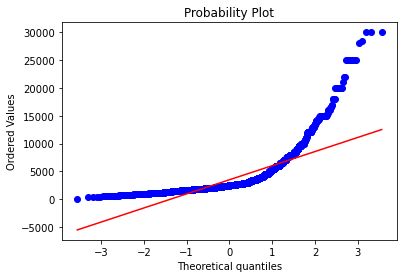

In [76]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats

fig = go.Figure()

m, s = norm.fit(df.rent)
gaussian_data = np.random.normal(m, s, 10000)

hist_data = [df.rent, gaussian_data]
group_labels = ['Current rent distribution', 'Normalized rent distribution'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels,
                         show_rug=False, show_hist = False, histnorm='probability density', show_curve=True, bin_size=150)
py.iplot(fig)

prob = stats.probplot(df['rent'], plot=plt)

Here we can see how different from a normal distribution our right-skewed distribution actually is. In the probability plot, for example, the blue line should closely follow the red line across the plot. 

That's a problem since the regression techniques we'll use assume our data is approximately normally distributed. To solve this issue we'll perform a log transformation on our rent variable, since for positive skewed distributions log transformation usually works well.

In [77]:
antes = df[['area', 'rent'].sample(200)

antes.to_csv('antes.csv', index = False)

In [78]:
#Transforming column
df['rent'] = np.log(df['rent'])

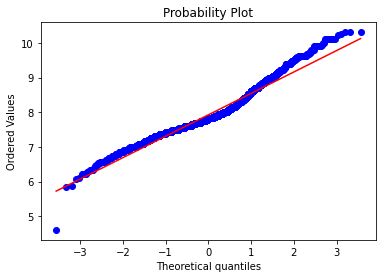

In [79]:
fig = go.Figure()

m, s = norm.fit(df.rent)
gaussian_data = np.random.normal(m, s, 10000)

hist_data = [df.rent, gaussian_data]
group_labels = ['Current rent distribution', 'Normalized rent distribution'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels,
                         show_rug=False, show_hist = False, histnorm='probability density', show_curve=True, bin_size=150)
py.iplot(fig)


prob = stats.probplot(df['rent'], plot= plt)

Now that we've performed the log transformation, our dependent variable's distribution is much more approximate to a normal distribution and the probability plot fits really close to the red line.

As seen in previous scatter plots, the area column also has a positive skewness, for that reason we'll also transform it using log.

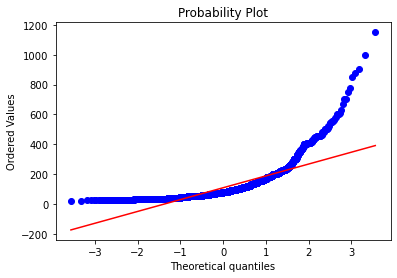

In [80]:
fig = go.Figure()

m, s = norm.fit(df.area)
gaussian_data = np.random.normal(m, s, 10000)

hist_data = [df.area, gaussian_data]
group_labels = ['Current area distribution', 'Normalized area distribution'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels,
                         show_rug=False, show_hist = False, histnorm='probability density', show_curve=True, bin_size=150)
py.iplot(fig)


prob = stats.probplot(df['area'], plot= plt)

In [81]:
#Transforming column
df['area'] = np.log(df['area'])

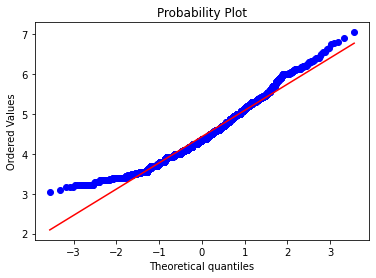

In [82]:
fig = go.Figure()

m, s = norm.fit(df.area)
gaussian_data = np.random.normal(m, s, 10000)

hist_data = [df.area, gaussian_data]
group_labels = ['Current area distribution', 'Normalized area distribution'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels,
                         show_rug=False, show_hist = False, histnorm='probability density', show_curve=True, bin_size=150)
py.iplot(fig)


prob = stats.probplot(df['area'], plot= plt)

In [83]:
#selecting continous columns
cont_cols = ['area', 'beach_distance']

#function to plot scatter plots
for col in cont_cols:
    trace = go.Scatter(x = df[col],
                       y = df.rent,
                       mode = 'markers',
                       marker =  {'color' : '#2d98da',
                              'line' : {'width': 1,
                                        'color': '#3B3B98'}}, opacity = .8)
                       
    data = [trace]
                       
    layout = go.Layout(title= 'Rent by ' + col,
                       yaxis={'title':'Rent'},
                       xaxis={'title': col}, title_y = 0.9, autosize=False,
    width=900,
    height=500)

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

As explained in <a href = 'https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#5.-Getting-hard-core'> this notebook</a> homoscedasticity is the assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s) <a href = 'https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/9332536503/ref=as_sl_pc_tf_til?tag=pmarcelino-20&linkCode=w00&linkId=5e9109fa2213fef911dae80731a07a17&creativeASIN=9332536503'>(Hair et al., 2013)</a>. The previous scatter plots made before the log transformations did not exhibit homoscedasticity.

Now plotting the scatter plot after the transformations we can see that the two continous columns show much more homocedasticity than before.

In [85]:
abs(df.corr()['area']).sort_values(ascending = False)

area                 1.000000
bedrooms             0.797893
rent                 0.728779
bathrooms            0.649161
parking_spots        0.532829
furnished            0.352954
security             0.192370
more_than_1_floor    0.069685
kitchen              0.053394
barbecue_grill       0.037805
longitude            0.034010
latitude             0.020025
beach_distance       0.002493
Name: area, dtype: float64

In [84]:
#exporting our dataframe to csv
df.to_csv('eda_df.csv', index = False)
df.to_excel('after.xlsx')